In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
#Q1
df_yelp = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT7/master/data/yelp.csv")

In [3]:
# Q2
def count_words(text):
    split_sent = text.split()
    return len(split_sent)

df_yelp["len_text"] = ""
for j,i in enumerate(df_yelp["text"]):
    df_yelp["len_text"][j] = count_words(i)

<ipython-input-3-f396faa410ab>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_yelp["len_text"][j] = count_words(i)


In [4]:
# Q3
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numdf = df_yelp.select_dtypes(include=numerics)
for i in numdf.columns:
    print("Mean of",i," feature is",numdf[i].mean())

Mean of stars  feature is 3.7775
Mean of cool  feature is 0.8768
Mean of useful  feature is 1.4093
Mean of funny  feature is 0.7013


In [5]:
#Q4
numdf.corr()

,stars,cool,useful,funny
stars,1.000000,0.052555,-0.023479,-0.061306
cool,0.052555,1.000000,0.887102,0.764342
useful,-0.023479,0.887102,1.000000,0.723406
funny,-0.061306,0.764342,0.723406,1.000000


<AxesSubplot:>

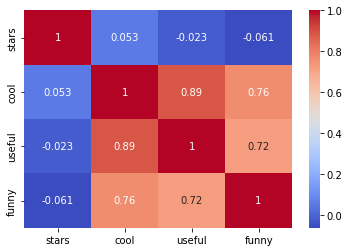

In [6]:
#Q5
sns.heatmap(data = numdf.corr(), annot = True, cmap = 'coolwarm')

In [7]:
#Q6
df_yelp_class = df_yelp[(df_yelp['stars'] == 1)|(df_yelp['stars'] == 5)]

In [8]:
#Q7
X = df_yelp['text']
y = df_yelp['stars']

In [18]:
#Q8
from docx import *
import glob

def getText(filename):
    doc = Document(filename)
    fullText = []
    for para in doc.paragraphs:
        fullText.append(para.text.strip("\n"))
        
    return " ".join(fullText)
PATH = "../Data/*.docx"
files = glob.glob(PATH)

corpus_list = []
for f in files:
    cur_corpus = getText(f)
    corpus_list.append(cur_corpus)

../Data\Big Data - Assignmnent.docx.docx
../Data\ML_Report.docx


In [20]:
#Q9
pd.DataFrame(corpus_list).to_csv("../Data/corpus.csv")

## Q10

### Using Corpus, different datasources can be merged into a single object
### The size of the corpus will be significatly lower than csv files
### Also, processing time required for the data will be more faster in corpus